Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:

6. Scaled sound pressure level, in decibels.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data-set

airfoil = pd.read_csv("airfoil_self_noise.dat",names=['freq','Aoa','chord','velocity','suction','sound_pre'],delim_whitespace=True)

## EDA of the data

In [3]:
airfoil.head()

,freq,Aoa,chord,velocity,suction,sound_pre
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airfoil.tail()

,freq,Aoa,chord,velocity,suction,sound_pre
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [5]:
airfoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   freq       1503 non-null   int64  
 1   Aoa        1503 non-null   float64
 2   chord      1503 non-null   float64
 3   velocity   1503 non-null   float64
 4   suction    1503 non-null   float64
 5   sound_pre  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [6]:
airfoil.shape

(1503, 6)

In [7]:
airfoil.describe()

,freq,Aoa,chord,velocity,suction,sound_pre
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


no null values found to be taken care of, let's see for outliers and vizualization of data

## Vizualization

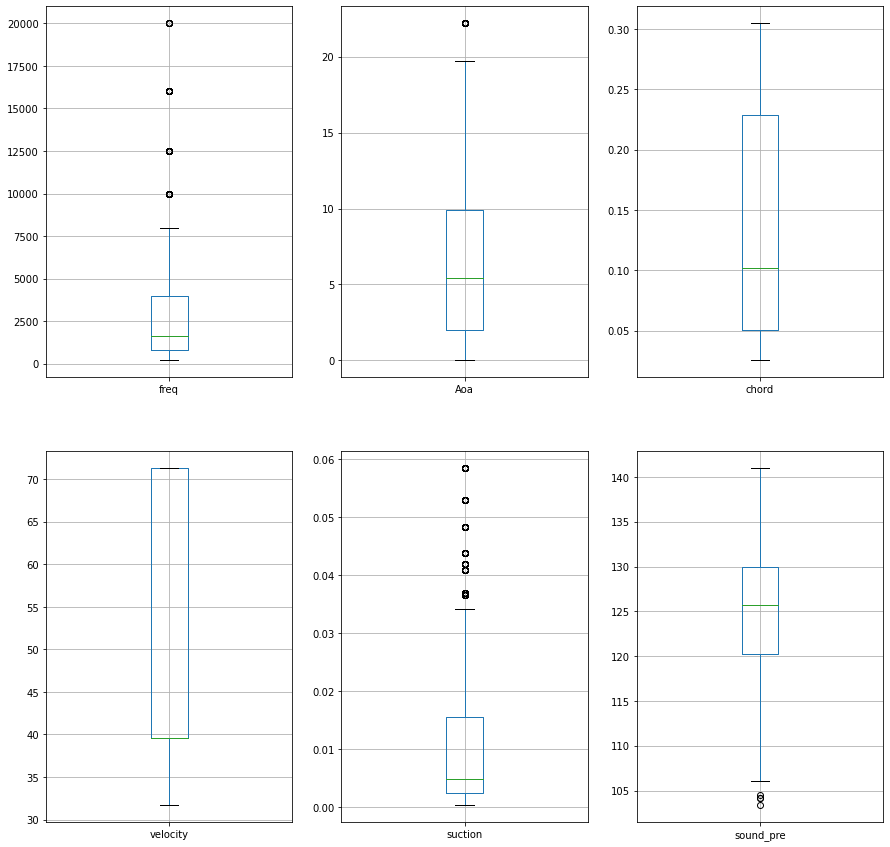

In [8]:
# Using box plots to find outliers
plt.figure(figsize=[15,15])
rows = 2
cols = len(airfoil.columns)//rows
j=0
for i in airfoil.columns:
    j+=1
    plt.subplot(rows,cols,j)
    airfoil.boxplot(i)
plt.show()

there are outliers but doesn't look like an error

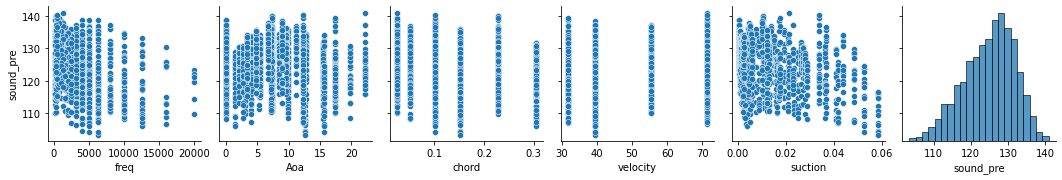

In [9]:
sns.pairplot(data=airfoil,y_vars='sound_pre')

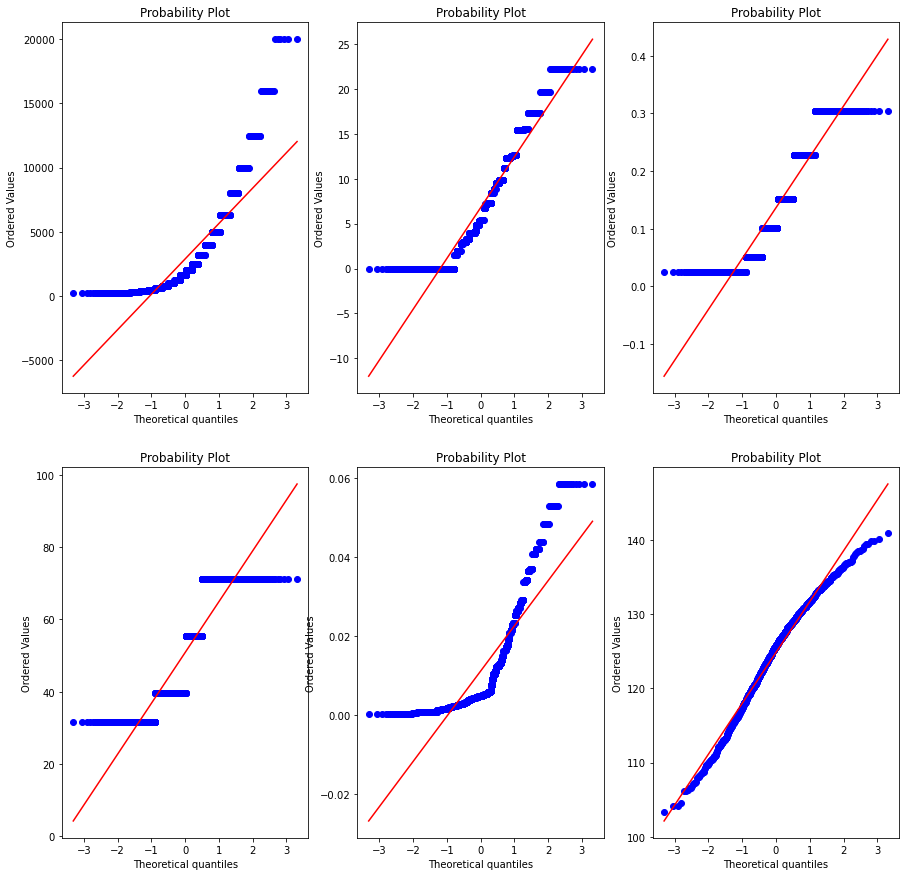

In [10]:
# Q-Q analysis

from scipy.stats import probplot
plt.figure(figsize=[15,15])
rows = 2
cols = len(airfoil.columns)//rows
j=0
for i in airfoil.columns:
    j+=1
    plt.subplot(rows,cols,j)
    probplot(airfoil[i],dist='norm',plot=plt);
plt.show()


<AxesSubplot:>

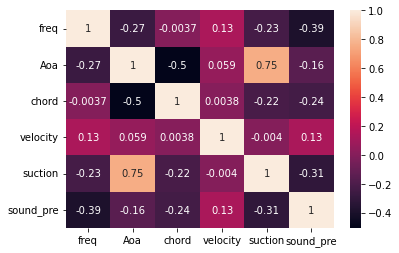

In [11]:
sns.heatmap(data=airfoil.corr(),annot=True)

Form the above vizualization we can say that there is negligible correlation in the data and, the sound pressure is normally distributed

## model creation

In [12]:
# declaring X and y

X = airfoil.drop(columns='sound_pre')

y = airfoil.sound_pre.copy()

In [13]:
X,y

(      freq   Aoa   chord  velocity   suction
 0      800   0.0  0.3048      71.3  0.002663
 1     1000   0.0  0.3048      71.3  0.002663
 2     1250   0.0  0.3048      71.3  0.002663
 3     1600   0.0  0.3048      71.3  0.002663
 4     2000   0.0  0.3048      71.3  0.002663
 ...    ...   ...     ...       ...       ...
 1498  2500  15.6  0.1016      39.6  0.052849
 1499  3150  15.6  0.1016      39.6  0.052849
 1500  4000  15.6  0.1016      39.6  0.052849
 1501  5000  15.6  0.1016      39.6  0.052849
 1502  6300  15.6  0.1016      39.6  0.052849
 
 [1503 rows x 5 columns],
 0       126.201
 1       125.201
 2       125.951
 3       127.591
 4       127.461
          ...   
 1498    110.264
 1499    109.254
 1500    106.604
 1501    106.224
 1502    104.204
 Name: sound_pre, Length: 1503, dtype: float64)

In [14]:
# importing model creating libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
score = 0
random = 0
best_size = 0
sizes = [.30,.25,.20]
for size in sizes:
    for l in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=size , random_state=l)

        multi_reg = LinearRegression()

        multi_reg.fit(X_train,y_train)

        Model_score = multi_reg.score(X_test,y_test)

        if Model_score > score:
            score = Model_score
            random = l
            best_size = size
print(f"to get best accuracy \n random state = {random} \n train size = {1-best_size}, Best score is : {score} ")

to get best accuracy 
 random state = 884 
 train size = 0.8, Best score is : 0.6275772021334196 


In [18]:
# putting the values in the model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20 , random_state=884)

multi_reg = LinearRegression()

multi_reg.fit(X_train,y_train)

print("Coefficient: \n",multi_reg.coef_)

print("intercept: ",multi_reg.intercept_)

y_pred = multi_reg.predict(X_test)

print("Model score: ",multi_reg.score(X_test,y_test))

Coefficient: 
 [-1.22538569e-03 -4.45566798e-01 -3.51908480e+01  9.44893203e-02
 -1.40133413e+02]
intercept:  132.88947990681888
Model score:  0.6275772021334196


# The best accuracy obtained is 62.75%, we should try with different models